In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import LSTM

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# seed
import os
seed = 123
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
# load dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_dnn = x_train.reshape(-1, 784)
x_dnn_test = x_test.reshape(-1, 784)
print(x_dnn.shape)
print(x_dnn_test.shape)

x_cnn = x_train.reshape(-1, 28, 28, 1)
x_cnn_test = x_test.reshape(-1, 28, 28, 1)
print(x_cnn.shape)
print(x_cnn_test.shape)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# model
def DNN_model(drop=0.2, optimizer='adam'):
    inputs = Input(shape=(784))
    l1 = Dense(1000, activation='selu')(inputs)
    l1 = Dropout(drop)(l1)
    l2 = Dense(500, activation='selu')(l1)
    l2 = Dropout(drop)(l2)
    l3 = Dense(100, activation='selu')(l2)
    l3 = Dropout(drop)(l3)
    outputs = Dense(1)(l3)
    
    model = Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = optimizer, loss='mse')
    return model

def CNN_model(drop=0.2, optimizer='adam'):
    inputs = Input(shape=(28,28,1))
    l1 = Conv2D(32, (3,3), activation='selu', padding='same', kernel_initializer='he_normal')(inputs)
    l1 = Conv2D(32, (3,3), activation='selu', padding='same', kernel_initializer='he_normal')(l1)
    l1 = BatchNormalization()(l1)
    l1 = Activation('selu')(l1)
    l1 = MaxPooling2D((2,2))(l1)
    l2 = Conv2D(32, (3,3), activation='selu', padding='same', kernel_initializer='he_normal')(l1)
    l2 = Conv2D(32, (3,3), activation='selu', padding='same', kernel_initializer='he_normal')(l2)
    l2 = BatchNormalization()(l2)
    l2 = Activation('selu')(l2)
    l2 = MaxPooling2D((2,2))(l2)
    l3 = Flatten()(l2)
    l4 = Dense(100, activation='selu')(l3)
    l4 = Dropout(drop)(l4)
    outputs = Dense(1)(l4)
    
    model = Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = optimizer, loss='mse')
    return model

def LSTM_model(drop=0.2, optimizer='adam'):
    inputs = Input(shape=(28,28))
    l1 = LSTM(256, activation='selu', return_sequences=True)(inputs)
    l1 = Dropout(drop)(l1)
    l2 = LSTM(128, activation='selu')(l1)
    l2 = Dropout(drop)(l2)
    l3 = Dense(100, activation='selu')(l2)
    l3 = Dropout(drop)(l3)
    outputs = Dense(1)(l3)
    
    model = Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = optimizer, loss='mse')
    return model

In [4]:
model1 = DNN_model(0.2, 'adam')
model2 = CNN_model(0.3, 'rmsprop')
model3 = LSTM_model(0.2, 'adam')

hist_1 = model1.fit(x_dnn, y_train, batch_size=256, epochs=100)
hist_2 = model2.fit(x_cnn, y_train, batch_size=128, epochs=50)
hist_3 = model3.fit(x_train, y_train, batch_size=256, epochs=50)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 103us/sample - loss: 3.7440
Epoch 2/100
60000/60000 [==============================] - 6s 92us/sample - loss: 2.0127
Epoch 3/100
60000/60000 [==============================] - 6s 92us/sample - loss: 1.7095
Epoch 4/100
60000/60000 [==============================] - 5s 90us/sample - loss: 1.4655
Epoch 5/100
60000/60000 [==============================] - 5s 90us/sample - loss: 1.3077
Epoch 6/100
60000/60000 [==============================] - 5s 90us/sample - loss: 1.1580
Epoch 7/100
60000/60000 [==============================] - 5s 90us/sample - loss: 1.0605
Epoch 8/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.9878
Epoch 9/100
60000/60000 [==============================] - 6s 98us/sample - loss: 0.9107
Epoch 10/100
60000/60000 [==============================] - 6s 98us/sample - loss: 0.8536
Epoch 11/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.

60000/60000 [==============================] - 7s 112us/sample - loss: 0.1411
Epoch 92/100
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1374
Epoch 93/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1321
Epoch 94/100
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1311
Epoch 95/100
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1281
Epoch 96/100
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1309
Epoch 97/100
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1310
Epoch 98/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1257
Epoch 99/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1299
Epoch 100/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1279
Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 159s 3ms/sample - los

Epoch 32/50
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.1200
Epoch 33/50
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.1475
Epoch 34/50
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.1231
Epoch 35/50
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1245
Epoch 36/50
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1240
Epoch 37/50
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1086
Epoch 38/50
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.1364
Epoch 39/50
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.1528
Epoch 40/50
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.1261
Epoch 41/50
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1103
Epoch 42/50
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.1341
Epoch 43/50
60000/60

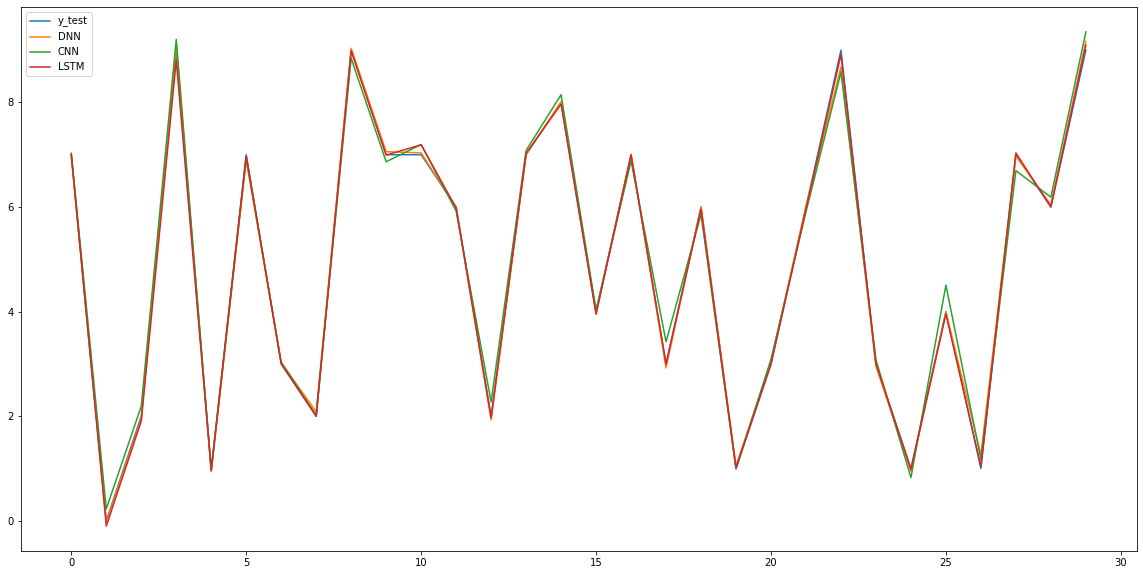

In [5]:
pred_1 = model1.predict(x_dnn_test)
pred_2 = model2.predict(x_cnn_test)
pred_3 = model3.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test[70:100], label='y_test')
ax.plot(pred_1[70:100], label='DNN')
ax.plot(pred_2[70:100], label='CNN')
ax.plot(pred_3[70:100], label='LSTM')
ax.legend()
plt.show()

In [9]:
pred_1[0][0]

7.024845

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
prediction1 = []
for i in range(len(pred_1)):
    for j in range(len(pred_1[0])):
        prediction1.append(round(pred_1[i][j]))
prediction1 = np.array(prediction1)        
        
prediction2 = []
for i in range(len(pred_2)):
    for j in range(len(pred_2[0])):
        prediction2.append(round(pred_2[i][j]))
prediction2 = np.array(prediction2)

prediction3 = []
for i in range(len(pred_3)):
    for j in range(len(pred_3[0])):
        prediction3.append(round(pred_3[i][j]))
prediction3 = np.array(prediction3)

In [12]:
prediction1

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
prediction2

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
prediction3

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(prediction1, y_test)
acc1

0.9521

In [16]:
acc2 = accuracy_score(prediction2, y_test)
acc2

0.9248

In [17]:
acc3 = accuracy_score(prediction3, y_test)
acc3

0.9766